# Load Data

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
import io

# read data
df = pd.read_csv(io.BytesIO(uploaded['startup data.csv']))

# Data Cleaning

In [ ]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [ ]:
# getting the columns of the dataset
columns = list(df.columns)
columns

['Unnamed: 0',
 'state_code',
 'latitude',
 'longitude',
 'zip_code',
 'id',
 'city',
 'Unnamed: 6',
 'name',
 'labels',
 'founded_at',
 'closed_at',
 'first_funding_at',
 'last_funding_at',
 'age_first_funding_year',
 'age_last_funding_year',
 'age_first_milestone_year',
 'age_last_milestone_year',
 'relationships',
 'funding_rounds',
 'funding_total_usd',
 'milestones',
 'state_code.1',
 'is_CA',
 'is_NY',
 'is_MA',
 'is_TX',
 'is_otherstate',
 'category_code',
 'is_software',
 'is_web',
 'is_mobile',
 'is_enterprise',
 'is_advertising',
 'is_gamesvideo',
 'is_ecommerce',
 'is_biotech',
 'is_consulting',
 'is_othercategory',
 'object_id',
 'has_VC',
 'has_angel',
 'has_roundA',
 'has_roundB',
 'has_roundC',
 'has_roundD',
 'avg_participants',
 'is_top500',
 'status']

In [ ]:
# examining missing values
print("Missing values distribution: ")
print(df.isnull().mean())
print("")

Missing values distribution: 
Unnamed: 0                  0.000000
state_code                  0.000000
latitude                    0.000000
longitude                   0.000000
zip_code                    0.000000
id                          0.000000
city                        0.000000
Unnamed: 6                  0.534128
name                        0.000000
labels                      0.000000
founded_at                  0.000000
closed_at                   0.637053
first_funding_at            0.000000
last_funding_at             0.000000
age_first_funding_year      0.000000
age_last_funding_year       0.000000
age_first_milestone_year    0.164680
age_last_milestone_year     0.164680
relationships               0.000000
funding_rounds              0.000000
funding_total_usd           0.000000
milestones                  0.000000
state_code.1                0.001083
is_CA                       0.000000
is_NY                       0.000000
is_MA                       0.000000
is_TX   

In [ ]:
# check datatype in each column
print("Column datatypes: ")
print(df.dtypes)

Column datatypes: 
Unnamed: 0                    int64
state_code                   object
latitude                    float64
longitude                   float64
zip_code                     object
id                           object
city                         object
Unnamed: 6                   object
name                         object
labels                        int64
founded_at                   object
closed_at                    object
first_funding_at             object
last_funding_at              object
age_first_funding_year      float64
age_last_funding_year       float64
age_first_milestone_year    float64
age_last_milestone_year     float64
relationships                 int64
funding_rounds                int64
funding_total_usd             int64
milestones                    int64
state_code.1                 object
is_CA                         int64
is_NY                         int64
is_MA                         int64
is_TX                         int64
is_others

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

#@title Data Visualizations

# Dataframe for plotting
location = df[['name','latitude', 'longitude', 'status']]

# Visualize startups founding locations by status
# Match the status values to colors
status_colors = {'closed': 'red', 'acquired': 'blue'}

# Create figure
fig = go.Figure()

# Iterate over unique statuses
for status in location['status'].unique():
    # Filter locations by status
    filtered_location = location[location['status'] == status]

    # Scatter points for startups of the current status
    loc = go.Scattergeo(
        lat=filtered_location['latitude'],
        lon=filtered_location['longitude'],
        mode='markers',
        marker=dict(
            color=status_colors[status], # color of points by status
            size=6,
            symbol='circle'
        ),
        text=filtered_location['name'], # show name of startup in label
        name=status.capitalize()
    )

    fig.add_trace(loc)

# Add title
fig.update_layout(
    title_text="Startups Founding Location by Status",
    geo_scope="usa"
)

fig.show()

In [ ]:
# drop unnecessary columns
df.drop(['Unnamed: 0', 'latitude', 'longitude', 'zip_code', 'id', 'Unnamed: 6', 'labels', 'state_code.1', 'object_id', 'name', 'state_code', 'category_code'], axis = 1, inplace = True)
df.drop(['city', 'closed_at'],axis=1,inplace=True)

In [ ]:
#@title Data Maniputation for fitting machine learning algorithms
import numpy as np
from sklearn.model_selection import train_test_split

# Feature variables
df_X = df[df.columns[:-1]]

# Target variable
df_y = df[df.columns[-1]]

# Change binary target to 1 and 0
df_y = np.where((df_y == 'acquired'), 1, 0)

# replace missing values with average for each column
df_X = df_X.fillna(df_X.mean())

# Standardization
from sklearn.preprocessing import StandardScaler

column_names = df_X.columns
# Replace all date columns with its year
year_col = ["founded_at", "first_funding_at", "last_funding_at"]
for column in year_col:
  df_X[column] = pd.DatetimeIndex(df_X[column]).year

X_scaled = StandardScaler().fit_transform(df_X.loc[:])
X_scaled = pd.DataFrame(X_scaled, columns = column_names)

import random

random.seed(2023)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df_y, test_size = 0.2)

<ipython-input-9-9804c888214b>:15: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
# Check if scaled data has zero mean and unit variance
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

founded_at                  3.410297e-15
first_funding_at            3.384508e-14
last_funding_at            -2.719577e-14
age_first_funding_year      1.924547e-18
age_last_funding_year       6.735914e-18
age_first_milestone_year   -6.543460e-17
age_last_milestone_year     1.385674e-16
relationships              -4.041549e-17
funding_rounds              2.309456e-17
funding_total_usd          -1.924547e-18
milestones                 -7.313278e-17
is_CA                       1.154728e-17
is_NY                       2.117002e-17
is_MA                       1.347183e-17
is_TX                       4.618913e-17
is_otherstate               5.773641e-17
is_software                -6.158550e-17
is_web                      4.618913e-17
is_mobile                  -9.237825e-17
is_enterprise               1.828320e-17
is_advertising             -5.340618e-17
is_gamesvideo              -5.003822e-17
is_ecommerce               -2.309456e-17
is_biotech                 -1.732092e-17
is_consulting   

<Axes: >

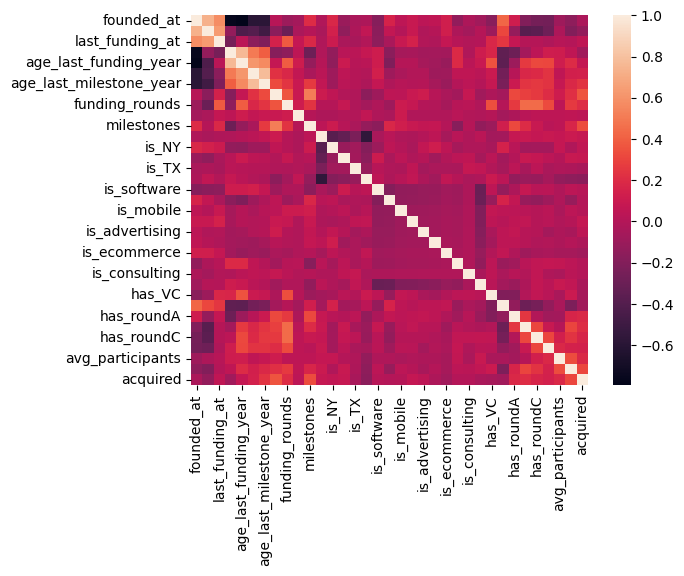

In [ ]:
import seaborn as sns
full_data = X_scaled
full_data["acquired"] = df_y
sns.heatmap(full_data.corr())

In [ ]:

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
#full_data.corr()

Reference: https://towardsdatascience.com/how-to-clean-your-data-in-python-8f178638b98d

# Logistic regression

In [ ]:
#https://www.analyticsvidhya.com/blog/2022/02/implementing-logistic-regression-from-scratch-using-python/
#https://www.youtube.com/watch?v=YYEJ_GUguHw&ab_channel=AssemblyAI

#@title Create logistic regression function

# Sigmoid function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

class LogisticRegression():

    def __init__(self, learning_rate=0.0001, epochs=10):
      self.learning_rate = learning_rate
      self.epochs = epochs
      self.weights = None
      self.bias = None

    def fit(self, X, y):

      # Get sample size and features from input data
      no_samples, no_features = X.shape

      # Initialize weights and bias to zero
      self.weights = np.zeros(no_features)
      self.bias = 0

      # Use gradient descent for the specified number of iterations
      # Weights & bias are adjusted iteratively to minimize the difference between the predicted probabilities and the true labels
      for _ in range(self.epochs):

        # Compute the linear predictions
        #  linear combination of features multiplied by their corresponding weights, plus the bias term
        linear_pred = np.dot(X, self.weights) + self.bias

        # Apply the sigmoid function to get the predicted probabilities
        predictions = sigmoid(linear_pred)

        # Compute gradients of the weights and bias
        dw = (1 / no_samples) * np.dot(X.T, (predictions - y))
        db = (1 / no_samples) * np.sum(predictions - y)

        # Update the weights and bias using the learning rate to get gradient
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

    def predict(self, X):

      # Compute predictions
      linear_pred = np.dot(X, self.weights) + self.bias
      y_pred = sigmoid(linear_pred)

      # Convert the predicted probabilities to class labels
      class_pred = np.where(y_pred <= 0.5, 0, 1)

      return class_pred


In [ ]:
#@title Training model
import time

# Start the timer
start_time = time.time()

# Begin training and fitting model
model = LogisticRegression(learning_rate = 1, epochs = 25)
model.fit(X_train.to_numpy(), y_train)

# Predict
train_pred = model.predict(X_train.to_numpy())
test_pred = model.predict(X_test.to_numpy())

end_time = time.time()

# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Computational time: {execution_time} seconds")


Computational time: 0.033933162689208984 seconds


In [ ]:
#@title Find accuracy
def accuracy(y_pred, y_test):
  return np.sum(y_pred == y_test)/len(y_test)

# Compute Accuracy
print("accuracy on train dataset: {}".format(accuracy(y_train, train_pred)))
print("accuracy on test dataset: {}".format(accuracy(y_test, test_pred)))

accuracy on train dataset: 0.7520325203252033
accuracy on test dataset: 0.7567567567567568


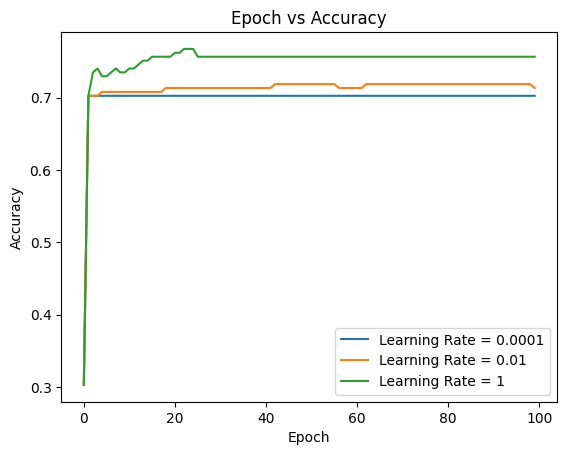

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Define the accuracy function
def accuracy(y_pred, y_test):
  return np.sum(y_pred == y_test)/len(y_test)

# Lists to store the epoch and accuracy values
epochs = []
accuracies_lr_0001 = []
accuracies_lr_1 = []
accuracies_lr_01 = []

learning_rates = [0.0001, 0.01, 1]

# Train the model and calculate accuracy on the validation set after each epoch
for epoch in range(100):
    model_lr_0001 = LogisticRegression(learning_rate=0.0001, epochs=epoch)
    model_lr_1 = LogisticRegression(learning_rate=1, epochs=epoch)
    model_lr_01 = LogisticRegression(learning_rate=0.01, epochs=epoch)

    model_lr_0001.fit(X_train.to_numpy(), y_train)
    model_lr_1.fit(X_train.to_numpy(), y_train)
    model_lr_01.fit(X_train.to_numpy(), y_train)

    test_pred_lr_0001 = model_lr_0001.predict(X_test.to_numpy())
    test_pred_lr_1 = model_lr_1.predict(X_test.to_numpy())
    test_pred_lr_01 = model_lr_01.predict(X_test.to_numpy())

    accuracy_val_lr_0001 = accuracy(y_test, test_pred_lr_0001)
    accuracy_val_lr_1 = accuracy(y_test, test_pred_lr_1)
    accuracy_val_lr_01 = accuracy(y_test, test_pred_lr_01)

    epochs.append(epoch)
    accuracies_lr_0001.append(accuracy_val_lr_0001)
    accuracies_lr_1.append(accuracy_val_lr_1)
    accuracies_lr_01.append(accuracy_val_lr_01)

# Plot the epoch vs accuracy graph
plt.plot(epochs, accuracies_lr_0001, label='Learning Rate = 0.0001')
plt.plot(epochs, accuracies_lr_01, label='Learning Rate = 0.01')
plt.plot(epochs, accuracies_lr_1, label='Learning Rate = 1')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.legend()
plt.show()


If your results show that the accuracy remains the same after the first epoch and continues to be 74% for all subsequent epochs, it suggests that the model has reached its optimal performance or convergence. In other words, further training beyond the first epoch does not improve the accuracy of the model on the validation set.

This could mean that the model has already learned the underlying patterns and relationships in the data during the initial epoch, and additional iterations do not result in significant improvements. It's possible that the data is relatively simple and can be effectively captured by the model in a single epoch.

In such cases, you can consider stopping the training early to save computational resources, as the model has already achieved its best performance. However, it's always a good practice to evaluate the model on different datasets and perform additional analysis to ensure the stability and generalizability of the model's performance.

In [ ]:
accuracies_lr_01

[0.3027027027027027,
 0.7027027027027027,
 0.7027027027027027,
 0.7027027027027027,
 0.7081081081081081,
 0.7081081081081081,
 0.7081081081081081,
 0.7081081081081081,
 0.7081081081081081,
 0.7081081081081081,
 0.7081081081081081,
 0.7081081081081081,
 0.7081081081081081,
 0.7081081081081081,
 0.7081081081081081,
 0.7081081081081081,
 0.7081081081081081,
 0.7081081081081081,
 0.7135135135135136,
 0.7135135135135136,
 0.7135135135135136,
 0.7135135135135136,
 0.7135135135135136,
 0.7135135135135136,
 0.7135135135135136,
 0.7135135135135136,
 0.7135135135135136,
 0.7135135135135136,
 0.7135135135135136,
 0.7135135135135136,
 0.7135135135135136,
 0.7135135135135136,
 0.7135135135135136,
 0.7135135135135136,
 0.7135135135135136,
 0.7135135135135136,
 0.7135135135135136,
 0.7135135135135136,
 0.7135135135135136,
 0.7135135135135136,
 0.7135135135135136,
 0.7135135135135136,
 0.7189189189189189,
 0.7189189189189189,
 0.7189189189189189,
 0.7189189189189189,
 0.7189189189189189,
 0.7189189189

In [ ]:
# Compare with sklearns model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Start the timer
start_time = time.time()

model = LogisticRegression(solver = 'saga')
model = model.fit(X_train.to_numpy(), y_train)
y_pred = model.predict(X_test)

end_time = time.time()

# Calculate the elapsed time
execution_time = end_time - start_time
print(f"Computational time: {execution_time} seconds")
print("Accuracy on test dataset: {}".format(accuracy(y_test, y_pred)))

Computational time: 0.07162332534790039 seconds
Accuracy on test dataset: 0.7567567567567568


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



# Decision tree

In [ ]:
#@title Create Decision Tree class

# Import necessary libraries
import pandas as pd
import numpy as np
from collections import Counter


class Node:
    """
    Class for creating the nodes for a decision tree
    """
    # Initiate variables
    def __init__(
        self,
        Y: list,
        X: pd.DataFrame,
        min_samples_split=None,
        max_depth=None,
        depth=None,
        node_type=None,
        rule=None
    ):
        # Store the target values and feature values of the node
        self.Y = Y
        self.X = X

        # Store the provided or default values
        self.min_samples_split = min_samples_split if min_samples_split else 2
        self.max_depth = max_depth if max_depth else 100

        # Stores the current depth of the node
        self.depth = depth if depth else 0

        # Extracting all the features
        self.features = list(self.X.columns)

        # Stores the type of node
        self.node_type = node_type if node_type else 'root'

        # Rule for spliting
        self.rule = rule if rule else ""

        # Counts Y in the node
        self.counts = Counter(Y)

        # Calculate the GINI impurity based on the Y distribution
        self.gini_impurity = self.get_GINI()

        # Sorting the counts and saving the final prediction of the node
        counts_sorted = list(sorted(self.counts.items(), key=lambda item: item[1]))

        # Getting the last item
        yhat = None
        if len(counts_sorted) > 0:
            yhat = counts_sorted[-1][0]

        # Saving to object attribute. This node will predict the class with the most frequent class
        self.yhat = yhat

        # Saving the number of observations in the node
        self.n = len(Y)

        # Initiating the left and right nodes as empty nodes
        self.left = None
        self.right = None

        # Default values for splits
        self.best_feature = None
        self.best_value = None

    # Define a static method within a class
    @staticmethod
    def GINI_impurity(y1_count: int, y2_count: int) -> float:
        """
        Given the observations of a binary class calculate the GINI impurity
        """
        # Ensuring the correct types
        if y1_count is None:
            y1_count = 0

        if y2_count is None:
            y2_count = 0

        # Getting the total observations
        n = y1_count + y2_count

        # If n is 0 then we return the lowest possible gini impurity
        if n == 0:
            return 0.0

        # Getting the probability to see each of the classes
        p1 = y1_count / n
        p2 = y2_count / n

        # Calculating GINI
        gini = 1 - (p1 ** 2 + p2 ** 2)

        # Returning the gini impurity
        return gini

    # Define a static method within a class
    @staticmethod
    def ma(x: np.array, window: int) -> np.array:
        """
        Calculates the moving average of the given list.
        """
        # x: The input array on which the convolution is performed
        # np.ones(window): An array of ones with a length equal to the window parameter
        # valid: The mode of convolution to use
        return np.convolve(x, np.ones(window), 'valid') / window

    def get_GINI(self):
        """
        Function to calculate the GINI impurity of a node
        """
        # Getting the 0 and 1 counts
        y1_count, y2_count = self.counts.get(0, 0), self.counts.get(1, 0)

        # Getting the GINI impurity
        return self.GINI_impurity(y1_count, y2_count)

    def best_split(self) -> tuple:
        """
        Given the X features and Y targets calculates the best split
        for a decision tree
        """
        # Creating a dataset for spliting
        df = self.X.copy()
        df['Y'] = self.Y

        # Getting the GINI impurity for the base input
        GINI_base = self.get_GINI()

        # Finding which split yields the best GINI gain
        max_gain = 0

        # Default best feature and split
        best_feature = None
        best_value = None

        for feature in self.features:
            # Droping missing values
            Xdf = df.dropna().sort_values(feature)

            # Sorting the values and getting the rolling average
            xmeans = self.ma(Xdf[feature].unique(), 2)

            for value in xmeans:
                # Spliting the dataset
                left_counts = Counter(Xdf[Xdf[feature]<value]['Y'])
                right_counts = Counter(Xdf[Xdf[feature]>=value]['Y'])

                # Getting the Y distribution from the dicts
                y0_left, y1_left, y0_right, y1_right = left_counts.get(0, 0), left_counts.get(1, 0), right_counts.get(0, 0), right_counts.get(1, 0)

                # Getting the left and right gini impurities
                gini_left = self.GINI_impurity(y0_left, y1_left)
                gini_right = self.GINI_impurity(y0_right, y1_right)

                # Getting the obs count from the left and the right data splits
                n_left = y0_left + y1_left
                n_right = y0_right + y1_right

                # Calculating the weights for each of the nodes
                w_left = n_left / (n_left + n_right)
                w_right = n_right / (n_left + n_right)

                # Calculating the weighted GINI impurity
                wGINI = w_left * gini_left + w_right * gini_right

                # Calculating the GINI gain
                GINIgain = GINI_base - wGINI

                # Checking if this is the best split so far
                if GINIgain > max_gain:
                    best_feature = feature
                    best_value = value

                    # Setting the best gain to the current one
                    max_gain = GINIgain

        # Check if the best feature and best value are not None
        if best_feature is not None and best_value is not None:
            return (best_feature, best_value)
        else:
            return (None, None)

    def grow_tree(self):
        """
        Recursive method to create the decision tree
        """
        # Making a dataframe from the data
        df = self.X.copy()
        df['Y'] = self.Y

        # If there is GINI to be gained, we split further
        if (self.depth < self.max_depth) and (self.n >= self.min_samples_split) and len(set(self.Y)) > 1:

            # Getting the best split
            best_feature, best_value = self.best_split()

            if best_feature is not None:
                # Saving the best split to the current node
                self.best_feature = best_feature
                self.best_value = best_value

                # Getting the left and right nodes
                left_df, right_df = df[df[best_feature]<=best_value].copy(), df[df[best_feature]>best_value].copy()

                # Creating the left and right nodes
                left = Node(
                    # The target variable values of the left subset converted to a list
                    left_df['Y'].values.tolist(),
                    # The features of the left subset
                    left_df[self.features],
                    # The depth of the left child node
                    depth=self.depth + 1,
                    # The maximum depth is passed to the left child node
                    max_depth=self.max_depth,
                    # The minimum number of samples required to perform a split is passed to the left child node
                    min_samples_split=self.min_samples_split,
                    # The node type of the left child node
                    node_type='left_node',
                     # The split rule
                    rule=f"{best_feature} <= {round(best_value, 3)}"
                    )

                # Assigning the left child node
                self.left = left
                # Growing the tree from the left child node
                self.left.grow_tree()

                right = Node(
                    # The target variable values of the right subset converted to a list
                    right_df['Y'].values.tolist(),
                    # The features of the right subset
                    right_df[self.features],
                    # The depth of the right child node
                    depth=self.depth + 1,
                    # The maximum depth is passed to the right child node
                    max_depth=self.max_depth,
                    # The minimum number of samples required to perform a split is passed to the right child node
                    min_samples_split=self.min_samples_split,
                    # The node type of the right child node
                    node_type='right_node',
                    # The split rule
                    rule=f"{best_feature} > {round(best_value, 3)}"
                    )

                # Assigning the right child node
                self.right = right
                # Growing the tree from the right child node
                self.right.grow_tree()

    def print_info(self, width=4):
        """
        Method to print the infromation about the tree
        """
        # Defining the number of spaces
        const = int(self.depth * width ** 1.5)
        spaces = "-" * const

        # print information
        if self.node_type == 'root':
            print("Root")
        else:
            print(f"|{spaces} Split rule: {self.rule}")
        print(f"{' ' * const}   | GINI impurity of the node: {round(self.gini_impurity, 2)}")
        print(f"{' ' * const}   | Class distribution in the node: {dict(self.counts)}")
        print(f"{' ' * const}   | Predicted class: {self.yhat}")

    def print_tree(self):
        """
        Prints the whole tree from the current node to the bottom
        """
        # Traverses the entire tree structure and prints the information
        # for each node in a depth-first manner
        self.print_info()

        if self.left is not None:
            self.left.print_tree()

        if self.right is not None:
            self.right.print_tree()

    def predict(self, X:pd.DataFrame):
        """
        Batch prediction method
        """
        # empty predictions list
        predictions = []

        for _, x in X.iterrows():
            # initializes an empty dictionary
            values = {}
            for feature in self.features:
                # Retrieves the corresponding value
                values.update({feature: x[feature]})

            # The predicted class label is appended
            predictions.append(self.predict_obs(values))

        return predictions

    def predict_obs(self, values: dict) -> int:
        """
        Method to predict the class given a set of features
        """
        # Assigning the current node to the root of the decision tree
        cur_node = self

        # Loop until the current node depth reaches the max depth
        while cur_node.depth < cur_node.max_depth:
            # Retrieves the best feature and best value for splitting at the current node
            best_feature = cur_node.best_feature
            best_value = cur_node.best_value

            # Flag variable to indicate if the loop should break
            should_break = False

            # Check if best_feature and best_value are not None
            if best_feature is not None and best_value is not None:
                # Check if there is a left child node
                if values.get(best_feature) < best_value:
                    if cur_node.left is not None:
                        cur_node = cur_node.left
                # Check if there is a right child node
                else:
                    if cur_node.right is not None:
                        cur_node = cur_node.right
            else:
                should_break = True

            # Break the loop if the flag is set to True
            if should_break:
                break

        # Return the predicted class
        return cur_node.yhat

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

# Start the timer
start_time = time.time()

# Setting the available hyper parameters of a tree
hp = {
    'max_depth': 100,
    'min_samples_split': 2
}

# Create an instance of the Node class
tree = Node(y_train, X_train, **hp)

# Grow the decision tree
tree.grow_tree()

# Print the tree
tree.print_tree()

# Make predictions on the test set
y_pred = tree.predict(X_test)

# End the timer
end_time = time.time()

# Calculate the elapsed time
execution_time = end_time - start_time

Root
   | GINI impurity of the node: 0.46
   | Class distribution in the node: {0: 264, 1: 474}
   | Predicted class: 1
|-------- Split rule: relationships <= -0.58
           | GINI impurity of the node: 0.43
           | Class distribution in the node: {0: 152, 1: 69}
           | Predicted class: 0
|---------------- Split rule: funding_total_usd <= -0.078
                   | GINI impurity of the node: 0.32
                   | Class distribution in the node: {0: 105, 1: 26}
                   | Predicted class: 0
|------------------------ Split rule: milestones <= -0.259
                           | GINI impurity of the node: 0.18
                           | Class distribution in the node: {0: 87, 1: 10}
                           | Predicted class: 0
|-------------------------------- Split rule: age_first_milestone_year <= 0.807
                                   | GINI impurity of the node: 0.11
                                   | Class distribution in the node: {0: 81, 1: 5}
 

In [ ]:
# Convert the predicted labels to a NumPy array
predicted_labels = np.array(y_pred)

# Calculate the accuracy by comparing predicted labels with true labels
accuracy = np.sum(predicted_labels == y_test) / len(y_test) * 100

# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy))
# Print the computational time
print(f"Computational time: {execution_time} seconds")

Accuracy: 72.43%
Computational time: 23.49403953552246 seconds


In [ ]:
#@title sklearn decision tree

# Compare with built-in decision tree
# Import libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Start timer
start_time = time.time()

# Create an instance of DecisionTreeClassifier
tree = DecisionTreeClassifier(min_samples_split=2, max_depth=100)

# Fit the decision tree on the training data
tree.fit(X_train, y_train)

# Make predictions on the test data
predictions = tree.predict(X_test)

# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy))

# End timer
end_time = time.time()

# Calculate the elapsed time
execution_time = end_time - start_time

# Print the computational time
print(f"Computational time: {execution_time} seconds")


Accuracy: 72.43%
Computational time: 0.009203910827636719 seconds


In [ ]:
#@title feature weights importance
# Get the feature importances
feature_importance = tree.feature_importances_

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)


                     Feature  Importance
7              relationships    0.242343
6    age_last_milestone_year    0.121168
9          funding_total_usd    0.096465
3     age_first_funding_year    0.063851
2            last_funding_at    0.060477
10                milestones    0.053276
4      age_last_funding_year    0.050280
0                 founded_at    0.049465
5   age_first_milestone_year    0.045970
32          avg_participants    0.040483
1           first_funding_at    0.030749
8             funding_rounds    0.022059
14                     is_TX    0.019780
16               is_software    0.019659
29                has_roundB    0.012687
15             is_otherstate    0.008859
25          is_othercategory    0.008756
26                    has_VC    0.008297
30                has_roundC    0.007960
12                     is_NY    0.005959
20            is_advertising    0.005899
11                     is_CA    0.005572
17                    is_web    0.005224
22              

https://towardsdatascience.com/decision-tree-algorithm-in-python-from-scratch-8c43f0e40173

https://towardsdatascience.com/introduction-to-decision-tree-classifiers-from-scikit-learn-32cd5d23f4d

# K- Nearest Neighbors

In [ ]:
import math
import numpy as np
from scipy.stats import mode

class KNN:
    def __init__(self, k):
        self.k = k
        self.X_train = None
        self.y_train = None
        self.distances = None

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)
        self.distances = self.compute_distance_matrix()

    def compute_distance_matrix(self):
        num_test = len(self.X_train)
        num_train = len(self.X_train)
        dist_matrix = np.zeros((num_test, num_train))

        for i in range(num_test):
            dist_matrix[i] = np.sqrt(np.sum(np.square(self.X_train - self.X_train[i]), axis=1))

        return dist_matrix

    def predict(self, X_test):
        y_pred = []
        X_test = np.array(X_test)

        for i in range(len(X_test)):
            dist = np.sqrt(np.sum(np.square(self.X_train - X_test[i]), axis=1))
            indices = np.argsort(dist)[:self.k]
            k_nearest_labels = self.y_train[indices]
            y_pred.append(mode(k_nearest_labels).mode[0])

        return y_pred



##todo:
#1: fit model
#2: plot
#3: classify groupings

In [ ]:
from sklearn.model_selection import train_test_split
import time
knn = KNN(k=15)


# Train the model
knn.fit(X_train, y_train)


# Make predictions
start_time = time.time()
predictions = knn.predict(X_test)
total_time = time.time() - start_time
print("Training Time:", total_time)
# Print the predictions
print(predictions)

NameError: ignored

In [ ]:
y_testval = y_test
correct = 0
true_positives = 0
false_positives = 0
#Y_test_numeric = []
#predictions_numeric = []
#for x in range(len(predictions)):
#  if predictions[x].equals
#  Y_test_numeric.append()
for x in range(len(y_testval)):
  if y_testval[x] == predictions[x]:
    correct = correct+1
accuracy = correct / len(y_testval)
print("Accuracy:", accuracy)

# Compute precision
for x in range(len(y_testval)):
  if y_testval[x] == 1 and predictions[x] == 1:
    true_positives = true_positives+1

for x in range(len(y_testval)):
  if y_testval[x] == 0 and predictions[x] == 1:
    false_positives = false_positives+1

#false_positives = sum((predictions == 'acquired') & (y_testval == 'closed'))
precision = true_positives / (true_positives + false_positives)
print("Precision:", precision)

Accuracy: 0.7513513513513513
Precision: 0.7552447552447552


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(X_train, y_train)
start_time = time.time()
predictions = neigh.predict(X_test)
total_time = time.time() - start_time
print("Training Time:", total_time)

y_testval = y_test
correct = 0
true_positives = 0
false_positives = 0
#Y_test_numeric = []
#predictions_numeric = []
#for x in range(len(predictions)):
#  if predictions[x].equals
#  Y_test_numeric.append()
for x in range(len(y_testval)):
  if y_testval[x] == predictions[x]:
    correct = correct+1
accuracy = correct / len(y_testval)
print("Accuracy:", accuracy)

# Compute precision
for x in range(len(y_testval)):
  if y_testval[x] == 1 and predictions[x] == 1:
    true_positives = true_positives+1

for x in range(len(y_testval)):
  if y_testval[x] == 0 and predictions[x] == 1:
    false_positives = false_positives+1

#false_positives = sum((predictions == 'acquired') & (y_testval == 'closed'))
precision = true_positives / (true_positives + false_positives)
print("Precision:", precision)

Training Time: 0.012396812438964844
Accuracy: 0.7513513513513513
Precision: 0.7552447552447552


In [ ]:
import matplotlib.pyplot as plt

# Generate odd values of k from 1 through 30
k_values = list(range(1, 31, 2))

# Initialize lists to store accuracy values and corresponding k values
accuracies = []
best_accuracy = 0.0
best_k = 0

# Iterate over each odd value of k
for k in k_values:
    # Create an instance of the KNN class with the current value of k
    knn = KNN(k)

    # Fit the model
    knn.fit(X_train, y_train)

    # Predict labels for the test set
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    accuracy = np.mean(y_pred == y_test)

    # Append accuracy and k value to the lists
    accuracies.append(accuracy)

    # Check if the current accuracy is the best so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

# Plot the accuracy vs. k values
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k')
plt.show()

print("Best k value:", best_k)
print("Best accuracy:", best_accuracy)


<ipython-input-46-a67cee5716bc>:35: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_pred.append(mode(k_nearest_labels).mode[0])


[0.6432432432432432, 0.6864864864864865, 0.7081081081081081, 0.7027027027027027, 0.6972972972972973, 0.7189189189189189, 0.7135135135135136, 0.7513513513513513, 0.7351351351351352, 0.7513513513513513, 0.7567567567567568, 0.7513513513513513, 0.7405405405405405, 0.7405405405405405, 0.7405405405405405]
[0.7264957264957265, 0.7293233082706767, 0.7407407407407407, 0.7352941176470589, 0.723404255319149, 0.7310344827586207, 0.722972972972973, 0.7552447552447552, 0.7333333333333333, 0.7449664429530202, 0.75, 0.7449664429530202, 0.7350993377483444, 0.7320261437908496, 0.7350993377483444]
[0.7371273712737128, 0.7371273712737128, 0.7371273712737128, 0.7371273712737128, 0.7371273712737128, 0.7371273712737128, 0.7371273712737128, 0.7371273712737128, 0.7371273712737128, 0.7371273712737128, 0.7371273712737128, 0.7371273712737128, 0.7371273712737128, 0.7371273712737128, 0.7371273712737128]
[0.7297734627831716, 0.7297734627831716, 0.7297734627831716, 0.7297734627831716, 0.7297734627831716, 0.7297734627

# Support Vector Machines

In [ ]:
# Load necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random

In [ ]:
# Prepare data
y_train_svm = pd.DataFrame(y_train.copy())
y_test_svm = pd.DataFrame(y_test.copy())

# Make output class -1 and 1
y_train_svm[0] = y_train_svm[0].replace({0: -1})
y_train_svm = y_train_svm.astype(np.float64)

y_test_svm[0] = y_test_svm[0].replace({0: -1})
y_test_svm = y_test_svm.astype(np.float64)

X_train_svm = pd.DataFrame(X_train.copy())
X_test_svm = pd.DataFrame(X_test.copy())

# Insert column of 1s into input data (for bias term)
X_train_svm.insert(0, "intercept", [1 for _ in range(X_train_svm.shape[0])])
X_test_svm.insert(0, "intercept", [1 for _ in range(X_test_svm.shape[0])])

In [ ]:
# Application of Class Material:
# Rather than solving for SVM using the closed form quadratic solve, this SVM
# class is trained iteratively using the gradient descent algorithm that was
# discussed in class. Further, SGD is used with a batch size of 1 to speed up
# training time. The learning rate for the model was also tuned to overcome
# the problems with convergence discussed during lecture.

class SVM():
    def __init__(self, X, y, C, learning_rate, eps, random_state=40):
        # Initialize all class members
        self.X = X
        self.y = y
        self.weights = np.zeros(self.X.shape[1])
        self.C = C
        self.learning_rate = learning_rate
        self.eps = eps

        self.losses = []
        self.random_state = random_state
        random.seed(random_state)

    def _compute_cost(self):
        N = self.X.shape[0]
        # Compute model loss
        distances = 1 - np.multiply(self.y[:,0], (np.dot(self.X, self.weights)))

        # Only track positive loss (based on hingle loss formulation)
        distances[distances < 0] = 0
        hinge_loss = self.C * (np.sum(distances) / N)

        # Compute and return model loss at current state
        cost = 1/2 * np.dot(self.weights, self.weights) + hinge_loss
        return cost

    def _calculate_cost_gradient(self, W, X_batch, Y_batch):
        # Compute error/loss
        distance = 1 - np.multiply(Y_batch[:,0], (np.dot(X_batch, W)))

        # Initialize gradient to zeros
        dw = np.zeros(len(W))

        for idx, d in enumerate(distance):
            if max(0, d) == 0: # Ignore negative distances
                di = W
            else: # Update gradient for given weight
                di = W - (self.C * Y_batch[idx] * X_batch[idx, :])
            dw += di

        # Normalize gradient
        dw = dw/len(Y_batch)
        return dw

    def fit_model(self, max_epochs=5000):
        # Initialize all weights to zero
        self.weights = np.zeros(self.X.shape[1])

        old_cost = 0
        # Run gradient descent for specified number of epochs
        for epoch in range(1, max_epochs):
            # Shuffle data to ensure independence of observations
            X_shuffled, y_shuffled = shuffle(self.X, self.y, random_state=self.random_state + epoch)

            # Set the number of random samples to retrieve
            n = 1

            # Get n random samples from the shuffled sequences
            random_indices = random.sample(range(len(X_shuffled)), n)
            random_X_samples = np.array([X_shuffled[i] for i in random_indices])
            random_y_samples = np.array([y_shuffled[i] for i in random_indices])

            # Compute gradient
            ascent = self._calculate_cost_gradient(self.weights, random_X_samples, random_y_samples)
            # Update weights based on gradient
            self.weights = self.weights - (self.learning_rate * ascent)

            # Compute new cost
            cost = self._compute_cost()

            # Store cost
            self.losses.append(cost)

            # Terminate if cost does not decrease substantially
            if abs(cost - old_cost) < self.eps * old_cost:
                print("terminating on epoch {0}".format(epoch))
                return

            # Update old cost
            old_cost = cost

    def predict(self, X):
        predictions = np.array([])
        for i in range(X.shape[0]):
            prediction = np.sign(np.dot(X[i], self.weights))
            predictions = np.append(predictions, prediction)
        return predictions


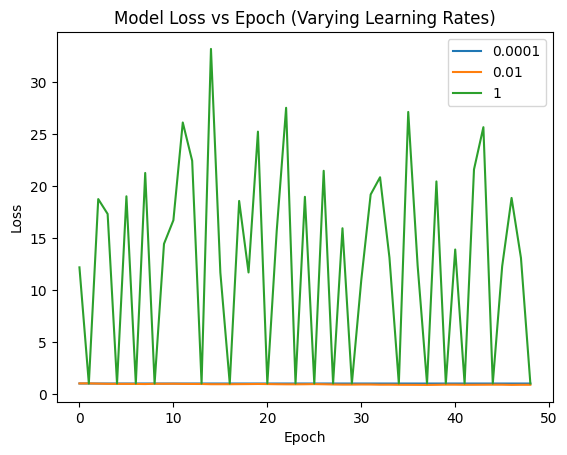

In [ ]:
# Perform hyperparameter tuning for learning rate
learning_rates = [0.0001, 0.01, 1]

for learning_rate in learning_rates:
    model = SVM(X_train_svm.to_numpy(), y_train_svm.to_numpy(), C=1, learning_rate = learning_rate, eps = 1e-10)
    model.fit_model(max_epochs=50)
    plt.plot(model.losses, label=learning_rate)
plt.legend()
plt.title("Model Loss vs Epoch (Varying Learning Rates)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

From the above plot we can see that a learning rate of 1 prevents our model from converging. A learning rate of 0.0001 is too low and results in no movement for the loss. A learning rate of 0.01 on the other hand seems to be ideal as the loss gradually decreases.

terminating on epoch 6
terminating on epoch 2


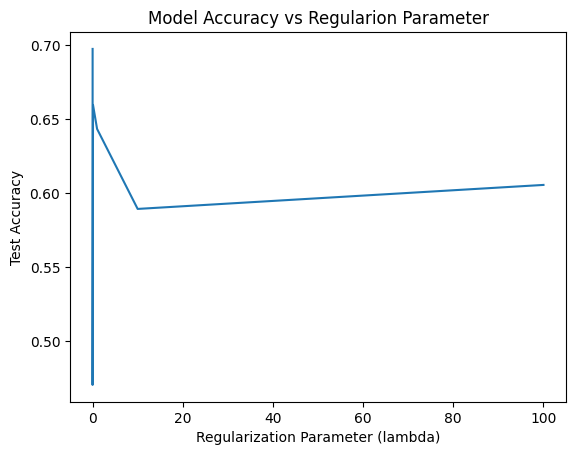

In [ ]:
# Perform hyperparameter tuning for lambda
reg_params = [0.01, 0.001, 0.1, 1, 10, 100]

test_accs = []
for reg_param in reg_params:
    model = SVM(X_train_svm.to_numpy(), y_train_svm.to_numpy(), C=reg_param, learning_rate = 0.01, eps = 1e-5)
    model.fit_model(max_epochs=50)

    test_predictions = model.predict(X_test_svm.to_numpy())
    test_accs.append(accuracy_score(y_test_svm, test_predictions))

plt.plot(reg_params, test_accs)
plt.title("Model Accuracy vs Regularion Parameter")
plt.xlabel("Regularization Parameter (lambda)")
plt.ylabel("Test Accuracy")
plt.show()

From the above plot we can see that setting the regularization parameter to C=10 results in the highest accuracy on the test set.

In [ ]:
# Fit model on training set using optimal hyperparameters
model = SVM(X_train_svm.to_numpy(), y_train_svm.to_numpy(), C=0.01, learning_rate = 0.01, eps = 1e-5)
model.fit_model(max_epochs=50)

terminating on epoch 6


In [ ]:
train_predictions = model.predict(X_train_svm.to_numpy())
test_predictions = model.predict(X_test_svm.to_numpy())
print("accuracy on train dataset: {}".format(accuracy_score(y_train_svm, train_predictions)))
print("accuracy on test dataset: {}".format(accuracy_score(y_test_svm, test_predictions)))

accuracy on train dataset: 0.6314363143631436
accuracy on test dataset: 0.6972972972972973


### Model Performance Analysis

In [ ]:
# Fit model on training set using optimal hyperparameters
import time
start_time = time.time()
model = SVM(X_train_svm.to_numpy(), y_train_svm.to_numpy(), C=0.01, learning_rate = 0.01, eps = 1e-5)
model.fit_model(max_epochs=50)
total_time = time.time() - start_time
print("Training Time:", total_time)
train_predictions = model.predict(X_train_svm.to_numpy())
test_predictions = model.predict(X_test_svm.to_numpy())
print("accuracy on test dataset: {}".format(accuracy_score(y_test_svm, test_predictions)))

terminating on epoch 6
Training Time: 0.011329174041748047
accuracy on test dataset: 0.6972972972972973


In [ ]:
# Compute performance to sklearn implementation
from sklearn.linear_model import SGDClassifier
svm = SGDClassifier(loss='hinge', alpha=0.01, learning_rate='constant', eta0=0.01, max_iter=50, tol=1e-5, early_stopping=True)

start_time = time.time()
svm.fit(X_train_svm.to_numpy(), y_train_svm.to_numpy())
total_time = time.time() - start_time
print("Training Time:", total_time)

# Evaluate the accuracy of the model
accuracy = svm.score(X_test_svm.to_numpy(), y_test_svm.to_numpy().flatten())
print("Accuracy:", accuracy)

Training Time: 0.015056848526000977
Accuracy: 0.7027027027027027


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

